In [1]:
###TEST FROM DOCUMENTATION

import hls4ml

#Fetch a keras model from our example repository
#This will download our example model to your working directory and return an example configuration file
config = hls4ml.utils.fetch_example_model('KERAS_3layer.json')

print(config) #You can print it to see some default parameters

#Convert it to a hls project
hls_model = hls4ml.converters.keras_to_hls(config)

#Use Vivado HLS to synthesize the model
#This might take several minutes
hls_model.build()

#Print out the report if you want
hls4ml.report.read_vivado_report('my-hls-test')

{'OutputDir': 'my-hls-test', 'ProjectName': 'myproject', 'Backend': 'Vivado', 'Version': '1.0.0', 'Part': 'xcvu13p-flga2577-2-e', 'ClockPeriod': 5, 'IOType': 'io_parallel', 'HLSConfig': {'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1}}, 'KerasJson': 'KERAS_3layer.json', 'KerasH5': 'KERAS_3layer_weights.h5'}
Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: fc1_relu, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 64]
Layer name: fc2_relu, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 32]
Layer name: fc3_relu, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: output_softmax, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 5]
Creating HLS model
Writing HLS project
Done
Project myproject_prj does not exist. Rerun "hls4ml build -p my-hls-test".
Project myproject_prj does not exist. Rerun "hls4ml b

sh: vivado_hls: command not found


In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras


In [2]:
X = np.load("/Users/jackcleeve/Desktop/Research/Karagiorgi-Lab/current_project/bnb_WithWire_00_pureNu_batch_00_10X4.npy")

In [3]:
X.shape

(2560, 864, 64, 1)

In [4]:
from qkeras.utils import _add_supported_quantized_objects
co = {}
_add_supported_quantized_objects(co)

In [5]:
model = keras.models.load_model("/Users/jackcleeve/Desktop/Research/Karagiorgi-Lab/current_project/Seokju_Models/noQDB_seq", custom_objects=co)

In [6]:
model.summary()

Model: "cicada-v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (QDense)             (None, 16)                884736    
                                                                 
 relu1 (QActivation)         (None, 16)                0         
                                                                 
 dense2 (QDense)             (None, 1)                 16        
                                                                 
 outputs (QActivation)       (None, 1)                 0         
                                                                 
Total params: 884752 (3.38 MB)
Trainable params: 884752 (3.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
import hls4ml


In [8]:
config = hls4ml.utils.config_from_keras_model(model, backend='Vitis', 
                                              default_precision='fixed<32,16>',
                                              granularity='name')

Interpreting Sequential
Topology:
Layer name: inputs_, layer type: InputLayer, input shapes: [[None, 55296]], output shape: [None, 55296]
Layer name: dense1, layer type: QDense, input shapes: [[None, 55296]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]


/Users/jackcleeve/anaconda3/envs/fastml310/lib/python3.10/site-packages/keras/src/constraints.py:365: UserWarning: The `keras.constraints.serialize()` API should only be used for objects of type `keras.constraints.Constraint`. Found an instance of type <class 'qkeras.quantizers.quantized_bits'>, which may lead to improper serialization.
  warnings.warn(


In [9]:
for layer in config['LayerName'].keys():
    config['LayerName'][layer]['Trace'] = True

In [10]:
config

{'Model': {'Precision': 'fixed<32,16>',
  'ReuseFactor': 1,
  'Strategy': 'Latency',
  'BramFactor': 1000000000,
  'TraceOutput': False},
 'LayerName': {'inputs_': {'Trace': True,
   'Precision': {'result': 'fixed<32,16>'}},
  'dense1': {'Trace': True,
   'Precision': {'result': 'fixed<32,16>',
    'weight': 'fixed<16,5>',
    'bias': 'fixed<32,16>',
    'accum': 'fixed<32,16>'},
   'ReuseFactor': 1},
  'dense1_linear': {'Trace': True,
   'Precision': {'result': 'fixed<32,16>', 'table': 'fixed<18,8>'},
   'ReuseFactor': 1,
   'TableSize': 1024},
  'relu1': {'Trace': True,
   'Precision': {'result': 'ufixed<16,4,RND_CONV,SAT>',
    'table': 'fixed<18,8>'},
   'ReuseFactor': 1,
   'TableSize': 1024},
  'dense2': {'Trace': True,
   'Precision': {'result': 'fixed<32,16>',
    'weight': 'fixed<16,5>',
    'bias': 'fixed<32,16>',
    'accum': 'fixed<32,16>'},
   'ReuseFactor': 1},
  'dense2_linear': {'Trace': True,
   'Precision': {'result': 'fixed<32,16>', 'table': 'fixed<18,8>'},
   'Reuse

In [11]:
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       io_type='io_parallel',
                                                       output_dir=f'noQBQ_hls4mlproj')

Interpreting Sequential
Topology:
Layer name: inputs_, layer type: InputLayer, input shapes: [[None, 55296]], output shape: [None, 55296]
Layer name: dense1, layer type: QDense, input shapes: [[None, 55296]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]
Creating HLS model


In [12]:
X_flat = X.reshape((2560,-1))

In [13]:
X_flat.shape

(2560, 55296)

In [14]:
Y = model.predict(X_flat)

80/80 [==============================] - 0s 3ms/step


In [15]:
hls_model.compile()

Writing HLS project


/Users/jackcleeve/anaconda3/envs/fastml310/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Done


In [16]:
fake_hls4ml_pred, hls4ml_trace = hls_model.trace(X)

Recompiling myproject with tracing
Writing HLS project
Done


In [17]:
Y_hls = hls_model.predict(X_flat)

In [18]:
len(Y)

2560

In [19]:
Y_hls[:35]

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.20703125],
       [ 6.1171875 ],
       [30.3984375 ],
       [11.40625   ]])

In [20]:
import matplotlib.pyplot as plt

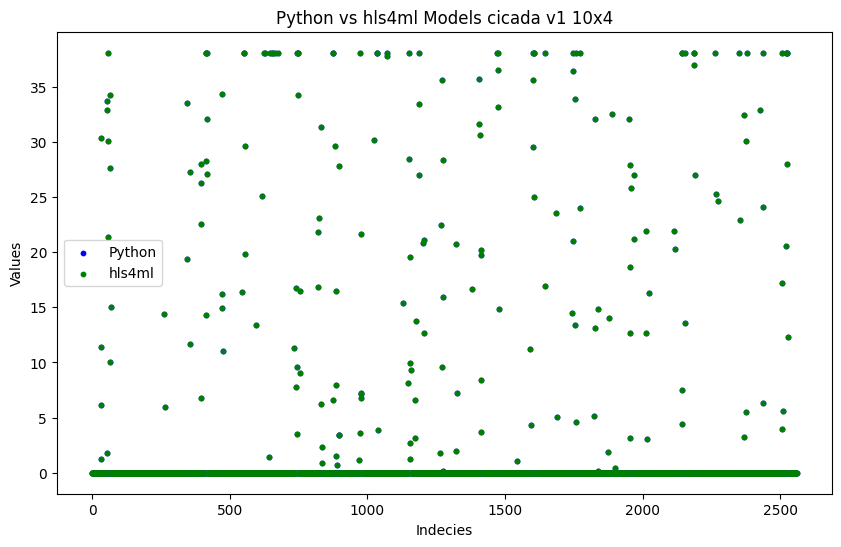

In [31]:
differences = [pred1 != pred2 for pred1, pred2 in zip(Y, Y_hls)]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y)), Y, color='blue', s=10, label='Python')
plt.scatter(range(len(Y_hls)), Y_hls, color='green', s=10, label='hls4ml')

plt.xlabel('Indecies')
plt.ylabel('Values')
plt.title('Python vs hls4ml Models cicada v1 10x4')
plt.legend()
plt.show()
# Labels and title

In [22]:
off_list = np.argwhere(~np.isclose(Y, Y_hls))

In [26]:
len(off_list)

3

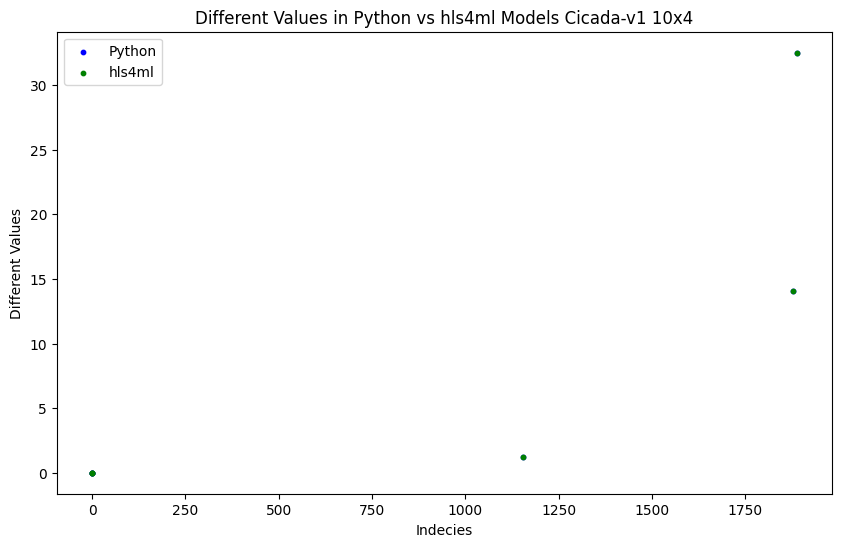

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(off_list, Y[off_list], color='blue', s=10, label='Python')
plt.scatter(off_list, Y_hls[off_list], color='green', s=10, label='hls4ml')

plt.xlabel('Indecies')
plt.ylabel('Different Values')
plt.title('Different Values in Python vs hls4ml Models Cicada-v1 10x4')
plt.legend()
plt.show()

In [24]:
non_zero_list = np.argwhere(~np.isclose(0.0, Y_hls))

In [25]:
len(non_zero_list)

214

In [27]:
off_list_indexes = []
for k in off_list:
    off_list_indexes.append(k[0])

for ind in off_list_indexes:
    print("Y: ")
    print(Y[ind])
    print("hls pred: ")
    print(Y_hls[ind])

Y: 
[1.2148438]
hls pred: 
[1.2109375]
Y: 
[14.050781]
hls pred: 
[14.046875]
Y: 
[32.515625]
hls pred: 
[32.51171875]


In [28]:
diff_sum=0
for ind in off_list_indexes:
    diff = abs(Y[ind] - Y_hls[ind])
    diff_sum=diff_sum+diff
diff_avg = diff_sum/len(off_list)
print(diff_avg)

[0.00390625]


In [29]:
diff_pct = []
for ind in off_list_indexes:
    diff = abs(Y[ind] - Y_hls[ind])
    if Y[ind]==0:
        temp_diff_pct = diff
    else:
        temp_diff_pct = diff/Y[ind]
    diff_pct.append(temp_diff_pct)

In [30]:
diff_pct_avg = sum(diff_pct)/len(diff_pct)
print(diff_pct_avg)

[0.00120453]


In [22]:
np.allclose(Y, Y_hls, atol=5e-3)

True

In [22]:
print(hls4ml_trace['dense1'][0])
print(hls4ml_trace['dense2'][0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.]


In [23]:
layers = model.layers
print(layers)
weights_one = model.layers[0].get_weights()
dense_weights = model.layers[2].get_weights()
print(layers)
print(weights_one)
print(dense_weights)

[<qkeras.qlayers.QDense object at 0x16c59e740>, <qkeras.qlayers.QActivation object at 0x16c59f100>, <qkeras.qlayers.QDense object at 0x16c59f490>, <qkeras.qlayers.QActivation object at 0x16c59fb50>]
[<qkeras.qlayers.QDense object at 0x16c59e740>, <qkeras.qlayers.QActivation object at 0x16c59f100>, <qkeras.qlayers.QDense object at 0x16c59f490>, <qkeras.qlayers.QActivation object at 0x16c59fb50>]
[array([[ 5.2962517e-03, -7.1111661e-03, -9.5765125e-03, ...,
        -1.6991718e-02, -1.8410236e-03,  7.5562634e-03],
       [-3.9863214e-03, -1.2156497e-03, -1.0881705e-02, ...,
        -1.0556822e-02,  6.2544383e-03, -2.2244209e-03],
       [-1.2529541e-02, -1.0623729e-02, -5.6811143e-03, ...,
        -9.7383959e-03,  4.8105670e-03, -1.0457798e-05],
       ...,
       [ 1.2660830e-02,  1.3011928e-02, -1.2195783e-02, ...,
        -6.7703542e-03, -1.1004283e-02, -1.2729759e-02],
       [ 2.5910765e-03,  2.6438888e-03, -3.3064559e-03, ...,
         8.4821535e-03, -1.8312840e-03, -7.5724064e-03],

In [24]:
hls_model.build(csim=False)

Project myproject_prj does not exist. Rerun "hls4ml build -p noQBQ_hls4mlproj".


sh: vivado_hls: command not found
